<a href="https://www.kaggle.com/code/anudeepadiraju/indian-monuments-cnn-prediction?scriptVersionId=111008802" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
ls = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        ls.append(os.path.join(dirname, filename))
ls[0]
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'/kaggle/input/indian-monuments-image-dataset/Indian-monuments/images/test/India_gate/i (94).jpg'

In [2]:
# Necessary Imports
import cv2
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import os
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-11-14 22:12:09.342070: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 22:12:09.439349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 22:12:09.440092: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [4]:
# Path to Kaggle Input
path = "../input/indian-monuments-image-dataset/Indian-monuments/images"
# Walk through the directory and list number of files
for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '../input/indian-monuments-image-dataset/Indian-monuments/images'.
There are 24 directories and 0 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test'.
There are 0 directories and 45 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/India_gate'.
There are 0 directories and 62 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/tajmahal'.
There are 0 directories and 100 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/iron_pillar'.
There are 0 directories and 34 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/Ellora Caves'.
There are 0 directories and 40 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/Sun Temple Konark'.
There are 0 directories and 42 images in '../input/indian-monuments-image-dataset/Indian-monuments/images/test/Fatehpur Sikri'.
There are 0 directories

In [5]:
# append the training and the testing paths to the original path
train_dir =  path + "/train/"
test_dir = path + "/test/"
train_dir

'../input/indian-monuments-image-dataset/Indian-monuments/images/train/'

In [6]:
# get all the class names
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['Ajanta Caves', 'Charar-E- Sharif', 'Chhota_Imambara',
       'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India',
       'Humayun_s Tomb', 'India gate pics', 'Khajuraho',
       'Sun Temple Konark', 'alai_darwaza', 'alai_minar',
       'basilica_of_bom_jesus', 'charminar', 'golden temple',
       'hawa mahal pics', 'iron_pillar', 'jamali_kamali_tomb',
       'lotus_temple', 'mysore_palace', 'qutub_minar', 'tajmahal',
       'tanjavur temple', 'victoria memorial'], dtype='<U21')

In [7]:
# function used to view an random image
def view_random_image(target_dir, target_class):
    target_folder = target_dir  + target_class
    
  # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

Image shape: (399, 612, 3)


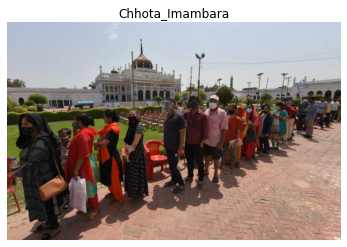

In [8]:
 #View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names)) # get a random class name

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(300, 300),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(300, 300),
                                              batch_size=32,
                                              class_mode='categorical')

Found 3666 images belonging to 24 classes.
Found 1049 images belonging to 24 classes.


In [10]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# # Create our model 
# model_1 = Sequential([
#   Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
#   Conv2D(10, 3, activation='relu'),
#   MaxPool2D(),
#   Conv2D(10, 3, activation='relu'),
#   Conv2D(10, 3, activation='relu'),
#   MaxPool2D(),
#   Flatten(),
#   Dense(24, activation='softmax') 
# ])

# # Compile the model
# model_1.compile(loss="categorical_crossentropy", 
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=["accuracy"])

In [11]:
# # Fit the model
# history_1 = model_1.fit(train_data, 
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=test_data,
#                         validation_steps=len(test_data))

In [12]:
# model_1.evaluate(test_data)

In [13]:
# plot_loss_curves(history_1)

In [14]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(300, 300, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(24, activation='softmax')
])

2022-11-14 22:12:11.121167: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 22:12:11.121558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 22:12:11.122401: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 22:12:11.123041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [15]:
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

2022-11-14 22:12:14.713061: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-11-14 22:12:16.478506: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


115/115 [==============================] - 99s 801ms/step - loss: 3.0786 - accuracy: 0.1746 - val_loss: 3.0574 - val_accuracy: 0.2240
Epoch 2/5
115/115 [==============================] - 64s 559ms/step - loss: 1.8270 - accuracy: 0.5074 - val_loss: 3.0571 - val_accuracy: 0.3394
Epoch 3/5
115/115 [==============================] - 65s 560ms/step - loss: 0.8421 - accuracy: 0.7801 - val_loss: 3.3766 - val_accuracy: 0.3985
Epoch 4/5
115/115 [==============================] - 64s 554ms/step - loss: 0.2732 - accuracy: 0.9430 - val_loss: 4.3642 - val_accuracy: 0.3804
Epoch 5/5
115/115 [==============================] - 65s 568ms/step - loss: 0.0915 - accuracy: 0.9883 - val_loss: 4.7944 - val_accuracy: 0.4051


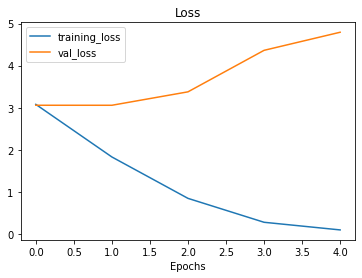

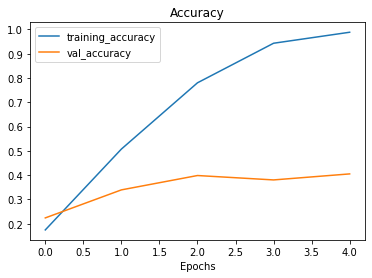

In [16]:
plot_loss_curves(history_10)

In [17]:
# train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
#                                              rotation_range=20, # note: this is an int not a float
#                                              width_shift_range=0.2,
#                                              height_shift_range=0.2,
#                                              zoom_range=0.2,
#                                              horizontal_flip=True)

# train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
#                                                                   target_size=(300, 300),
#                                                                   batch_size=32,
#                                                                   class_mode='categorical')

In [18]:
# # Clone the model (use the same architecture)
# model_11 = tf.keras.models.clone_model(model_10)

# # Compile the cloned model (same setup as used for model_10)
# model_11.compile(loss="categorical_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # Fit the model
# history_11 = model_11.fit(train_data_augmented, # use augmented data
#                           epochs=5,
#                           steps_per_epoch=len(train_data_augmented),
#                           validation_data=test_data,
#                           validation_steps=len(test_data))

In [19]:
# # Check out our model's performance with augmented data
# plot_loss_curves(history_11)

In [20]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=300):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
    
  return img

# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

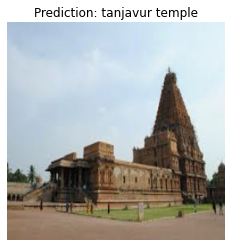

In [21]:
# make a new prediction
pred_and_plot(model_10, "../input/indian-monuments-image-dataset/Indian-monuments/images/test/tanjavur temple/20.jpeg", class_names)

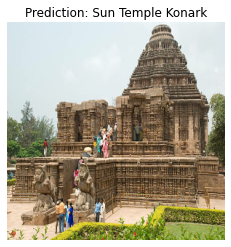

In [22]:
pred_and_plot(model_10, "../input/indian-monuments-image-dataset/Indian-monuments/images/test/Sun Temple Konark/14.jpg", class_names)

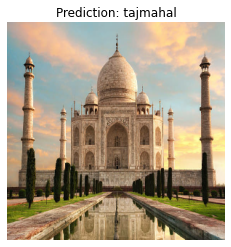

In [23]:
pred_and_plot(model_10, "../input/indian-monuments-image-dataset/Indian-monuments/images/test/tajmahal/92.jpg", class_names)    

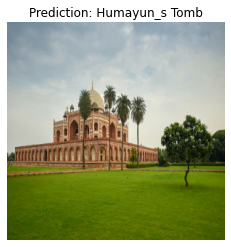

In [24]:
pred_and_plot(model_10, "../input/indian-monuments-image-dataset/Indian-monuments/images/test/Humayun_s Tomb/25.jpg", class_names)

In [25]:
# save the model
model_10.save("saved_trained_model")

2022-11-14 22:18:32.012293: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
